# Parsing Dates

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import re

In [45]:
landslides=pd.read_csv('C:\\Users\\cxz16\\kaggle 5-day challenge\\day3data\\catalog.csv')
earthquakes=pd.read_csv('C:\\Users\\cxz16\\kaggle 5-day challenge\\day3data\\earthquakes.csv')
volcanic=pd.read_csv('C:\\Users\\cxz16\\kaggle 5-day challenge\\day3data\\volcanic.csv')

np.random.seed(0)
%matplotlib inline

In [46]:
landslides.dtypes

id                        int64
date                     object
time                     object
continent_code           object
country_name             object
country_code             object
state/province           object
population                int64
city/town                object
distance                float64
location_description     object
latitude                float64
longitude               float64
geolocation              object
hazard_type              object
landslide_type           object
landslide_size           object
trigger                  object
storm_name               object
injuries                float64
fatalities              float64
source_name              object
source_link              object
dtype: object

In [47]:
landslides.date.head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [48]:
landslides['date_parsed']=pd.to_datetime(landslides['date'], \
                                       format="%m/%d/%y")

In [49]:
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [50]:
day_of_month_landslides=landslides['date_parsed'].dt.day

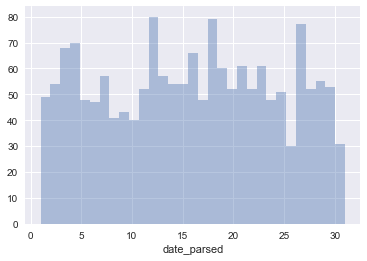

In [51]:
sns.distplot(day_of_month_landslides.dropna(),kde=False,bins=31)
sns.plt.show()

In [52]:
earthquakes.Date.head(20)

0     01/02/1965
1     01/04/1965
2     01/05/1965
3     01/08/1965
4     01/09/1965
5     01/10/1965
6     01/12/1965
7     01/15/1965
8     01/16/1965
9     01/17/1965
10    01/17/1965
11    01/24/1965
12    01/29/1965
13    02/01/1965
14    02/02/1965
15    02/04/1965
16    02/04/1965
17    02/04/1965
18    02/04/1965
19    02/04/1965
Name: Date, dtype: object

In [53]:
earthquakes.loc[earthquakes['Date'].apply(len)>10,'Date']

3378     1975-02-23T02:58:41.000Z
7512     1985-04-28T02:53:41.530Z
20650    2011-03-13T02:23:34.520Z
Name: Date, dtype: object

In [54]:
earthquakes['parsed_date']=pd.to_datetime(earthquakes['Date'],\
                                          infer_datetime_format=True)

#some value has time, this method can be used here
#time data '1975-02-23T02:58:41.000Z' does not match format '%m/%d/%Y' (match)

In [55]:
earthquakes.loc[earthquakes['Date'].apply(len)>10,'parsed_date']

3378    1975-02-23 02:58:41.000
7512    1985-04-28 02:53:41.530
20650   2011-03-13 02:23:34.520
Name: parsed_date, dtype: datetime64[ns]

In [56]:
#try this method, but the len>0 become NA, others are fine
earthquakes['parsed_date']=pd.to_datetime(earthquakes['Date'],\
                                      format="%m/%d/%Y",errors='coerce')

In [57]:
earthquakes.loc[earthquakes['Date'].apply(len)>10,'parsed_date']

3378    NaT
7512    NaT
20650   NaT
Name: parsed_date, dtype: datetime64[ns]

In [58]:
earthquakes.parsed_date.head()

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: parsed_date, dtype: datetime64[ns]

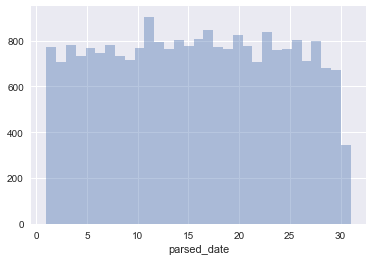

In [59]:
day_earthquakes=earthquakes['parsed_date'].dt.day
sns.distplot(day_earthquakes.dropna(),kde=False,bins=31)

In [60]:
volcanic.dtypes

Number                   int64
Name                    object
Country                 object
Region                  object
Type                    object
Activity Evidence       object
Last Known Eruption     object
Latitude               float64
Longitude              float64
Elevation (Meters)       int64
Dominant Rock Type      object
Tectonic Setting        object
dtype: object

In [61]:
volcanic['Last Known Eruption'].head() 

0    8300 BCE
1    4040 BCE
2     Unknown
3    3600 BCE
4     1282 CE
Name: Last Known Eruption, dtype: object

In [62]:
def change_to_date(i):
    if i[-3:]=='BCE':
        year=[int(s) for s in i.split() if s.isdigit()]
        return int(''.join(str(x) for x in year))*-1
    elif i[-3:]==' CE':
        year=[int(s) for s in i.split() if s.isdigit()]
        return ''.join(str(x) for x in year)
    elif i=='Unknown':
        return np.NaN

In [63]:
a=volcanic['Last Known Eruption'].apply(lambda x: change_to_date(x))
a.head()

0    -8300
1    -4040
2      NaN
3    -3600
4     1282
Name: Last Known Eruption, dtype: object

# Time Series Plotting

In [64]:
shelter=pd.read_csv("C:\\Users\\cxz16\\kaggle 5-day challenge\\day3data\\aac_shelter_cat_outcome_eng.csv")
prices=pd.read_csv("C:\\Users\\cxz16\\kaggle 5-day challenge\\day3data\\prices.csv")

In [65]:
prices.dtypes

date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

In [66]:
prices.head() #strongly show time series by 'date'

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [67]:
prices['date']=pd.to_datetime(prices['date'])
prices['date'].head()

0   2016-01-05
1   2016-01-06
2   2016-01-07
3   2016-01-08
4   2016-01-11
Name: date, dtype: datetime64[ns]

In [68]:
shelter.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black


In [69]:
shelter['date_of_birth']=pd.to_datetime(shelter['date_of_birth'])
shelter['date_of_birth'].head()

0   2014-07-07
1   2014-06-16
2   2014-03-26
3   2013-03-27
4   2013-12-16
Name: date_of_birth, dtype: datetime64[ns]

In [70]:
shelter['datetime']=pd.to_datetime(shelter['datetime'])
shelter['datetime'].head()

0   2014-07-22 16:04:00
1   2014-08-14 18:45:00
2   2014-06-29 17:45:00
3   2014-03-28 14:55:00
4   2014-01-09 19:29:00
Name: datetime, dtype: datetime64[ns]

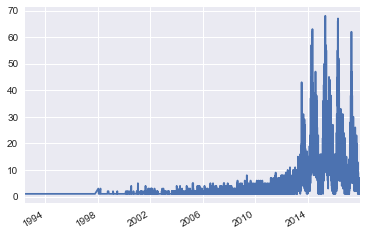

In [71]:
shelter['date_of_birth'].value_counts().plot()

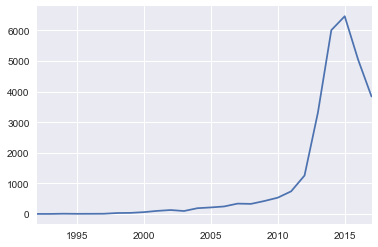

In [72]:
shelter['date_of_birth'].dt.year.value_counts().sort_index(axis=0).plot.line()

In [73]:
prices.dtypes

date      datetime64[ns]
symbol            object
open             float64
close            float64
low              float64
high             float64
volume           float64
dtype: object

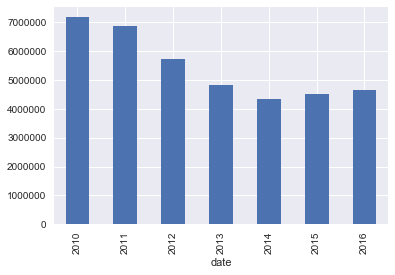

In [74]:
prices['volume'].groupby(prices['date'].dt.year).mean().plot.bar()

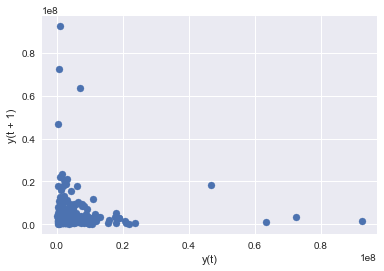

In [75]:
from pandas.plotting import lag_plot
lag_plot(prices['volume'].sample(250))